In [1]:
import numpy as np
import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import pandas as pd
import random
import os
from PIL import Image
import tensorflow as tf

In [2]:
i = 0
for image in glob.glob("D:/Other Projects/Crack detection/crack_data2/Positive/*.jpg"):
    if i%100 == 0:
        file, ext = os.path.splitext(image)
        with Image.open(image) as im:
            im.save(f'D:/Other Projects/Crack detection/dataAug/dataset/train/Positive/' + str (i) + '.jpg', 'JPEG')
    i = i+1

print("Done!")

Done!


In [3]:
i = 1
for image in glob.glob("D:/Other Projects/Crack detection/crack_data2/Positive/*.jpg"):
    if i%100 == 0:
        file, ext = os.path.splitext(image)
        with Image.open(image) as im:
            im.save(f'D:/Other Projects/Crack detection/dataAug/dataset/val/Positive/' + str (i) + '.jpg', 'JPEG')
    i = i+1

print("Done!")

Done!


In [4]:
i = 2
for image in glob.glob("D:/Other Projects/Crack detection/crack_data2/Positive/*.jpg"):
    if i%100 == 0:
        file, ext = os.path.splitext(image)
        with Image.open(image) as im:
            im.save(f'D:/Other Projects/Crack detection/dataAug/dataset/test/Positive/' + str (i) + '.jpg', 'JPEG')
    i = i+1

print("Done!")

Done!


In [5]:
i = 0
for image in glob.glob("D:/Other Projects/Crack detection/crack_data2/Negative/*.jpg"):
    if i%100 == 0:
        file, ext = os.path.splitext(image)
        with Image.open(image) as im:
            im.save(f'D:/Other Projects/Crack detection/dataAug/dataset/train/Negative/' + str (i) + '.jpg', 'JPEG')
    i = i+1

print("Done!")

Done!


In [6]:
i = 1
for image in glob.glob("D:/Other Projects/Crack detection/crack_data2/Negative/*.jpg"):
    if i%100 == 0:
        file, ext = os.path.splitext(image)
        with Image.open(image) as im:
            im.save(f'D:/Other Projects/Crack detection/dataAug/dataset/val/Negative/' + str (i) + '.jpg', 'JPEG')
    i = i+1

print("Done!")

Done!


In [7]:
i = 2
for image in glob.glob("D:/Other Projects/Crack detection/crack_data2/Negative/*.jpg"):
    if i%100 == 0:
        file, ext = os.path.splitext(image)
        with Image.open(image) as im:
            im.save(f'D:/Other Projects/Crack detection/dataAug/dataset/test/Negative/' + str (i) + '.jpg', 'JPEG')
    i = i+1

print("Done!")

Done!


In [8]:
BATCH = 26
IMG_WIDTH = 96
IMG_HEIGHT = 96

In [9]:
train_loader = tf.keras.preprocessing.image_dataset_from_directory('D:/Other Projects/Crack detection/dataAug/dataset/train', seed=123, image_size=(IMG_HEIGHT, IMG_WIDTH), batch_size = BATCH)
test_loader = tf.keras.preprocessing.image_dataset_from_directory('D:/Other Projects/Crack detection/output/test', seed=123, image_size = (IMG_HEIGHT, IMG_WIDTH), batch_size = BATCH)
validation_loader = tf.keras.preprocessing.image_dataset_from_directory('D:/Other Projects/Crack detection/dataAug/dataset/val', seed=123, image_size = (IMG_HEIGHT, IMG_WIDTH), batch_size=BATCH)

Found 400 files belonging to 2 classes.
Found 4000 files belonging to 2 classes.
Found 400 files belonging to 2 classes.


In [10]:
class_names = train_loader.class_names
print(class_names)

['Negative', 'Positive']


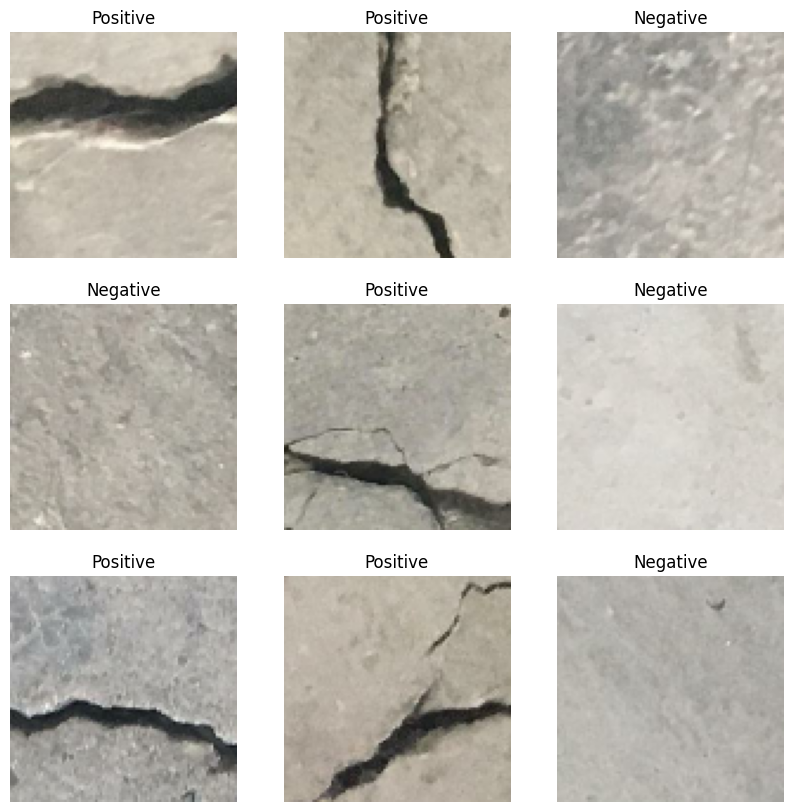

In [11]:
plt.figure(figsize = (10, 10))
for images, labels in train_loader.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [12]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_loader.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_dataset = test_loader.cache().prefetch(buffer_size=AUTOTUNE)
val_dataset = validation_loader.cache().prefetch(buffer_size=AUTOTUNE)

In [13]:
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(IMG_HEIGHT, 
                                                              IMG_WIDTH,
                                                              3)),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

model = tf.keras.models.Sequential([
    data_augmentation,
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
  
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    
    tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(len(class_names))
])

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 96, 96, 3)         0         
                                                                 
 rescaling (Rescaling)       (None, 96, 96, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 96, 96, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                  

In [15]:
epochs = 50
history = model.fit(
  train_dataset,
  validation_data=val_dataset,
  epochs=epochs
)

Epoch 1/50
16/16 [==============================] - 8s 235ms/step - loss: 0.7314 - accuracy: 0.4725 - val_loss: 0.6859 - val_accuracy: 0.5000
Epoch 2/50
16/16 [==============================] - 3s 165ms/step - loss: 0.6498 - accuracy: 0.5025 - val_loss: 0.5107 - val_accuracy: 0.5000
Epoch 3/50
16/16 [==============================] - 3s 168ms/step - loss: 0.4355 - accuracy: 0.8300 - val_loss: 0.3418 - val_accuracy: 0.9850
Epoch 4/50
16/16 [==============================] - 3s 170ms/step - loss: 0.3059 - accuracy: 0.9475 - val_loss: 0.2124 - val_accuracy: 0.9375
Epoch 5/50
16/16 [==============================] - 3s 165ms/step - loss: 0.1367 - accuracy: 0.9625 - val_loss: 0.6517 - val_accuracy: 0.9200
Epoch 6/50
16/16 [==============================] - 3s 181ms/step - loss: 0.2553 - accuracy: 0.9050 - val_loss: 0.1360 - val_accuracy: 0.9775
Epoch 7/50
16/16 [==============================] - 3s 192ms/step - loss: 0.1275 - accuracy: 0.9725 - val_loss: 0.1497 - val_accuracy: 0.9800
Epoch 

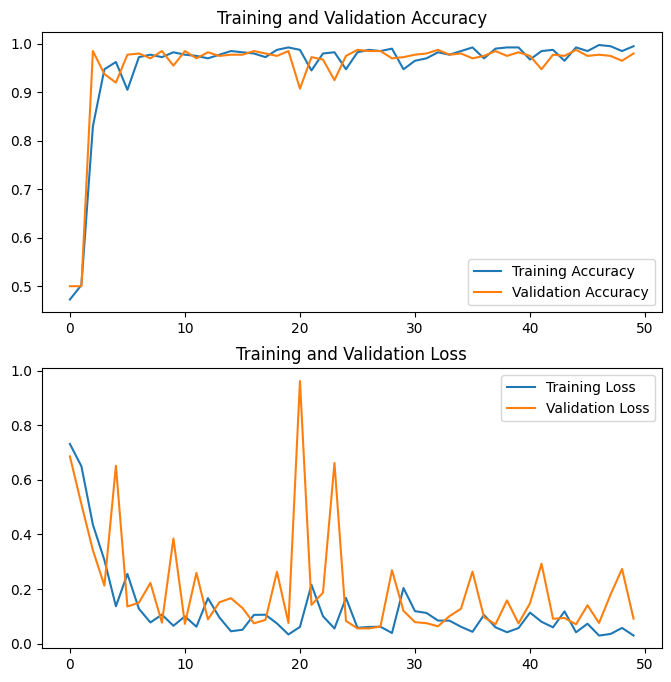

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [17]:
loss, accuracy = model.evaluate(test_dataset)

154/154 [==============================] - 11s 71ms/step - loss: 0.1319 - accuracy: 0.9830


1/1 [==============================] - 0s 32ms/step


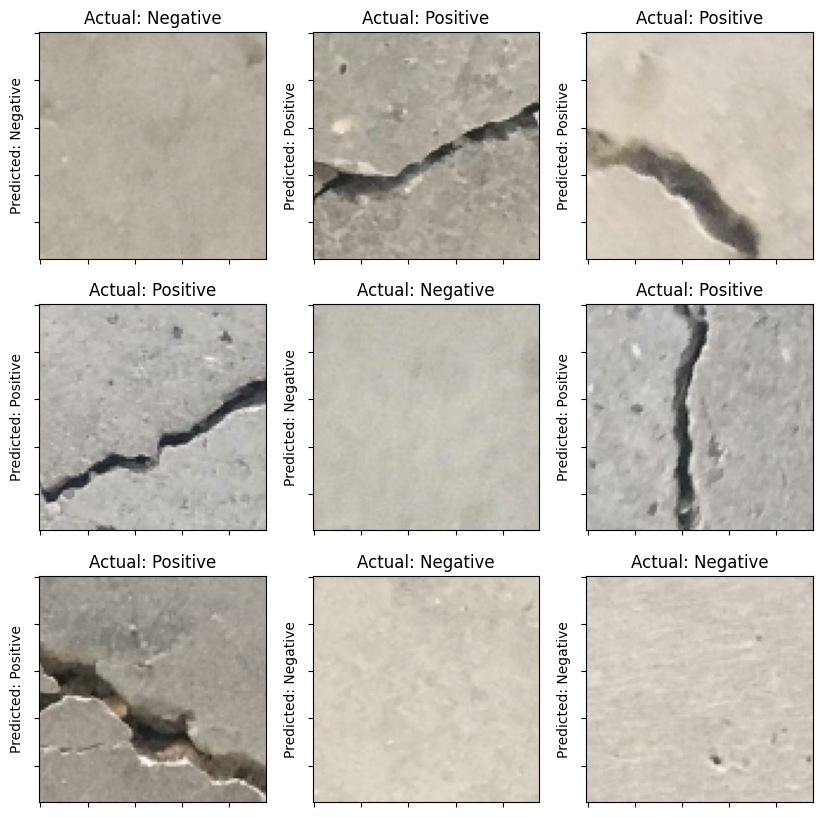

In [18]:
plt.figure(figsize=(10, 10))
for images, labels in test_loader.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predictions = model.predict(tf.expand_dims(images[i], 0))
        score = tf.nn.softmax(predictions[0])
        plt.ylabel("Predicted: "+class_names[np.argmax(score)])
        plt.title("Actual: "+class_names[labels[i]])
        plt.gca().axes.yaxis.set_ticklabels([])        
        plt.gca().axes.xaxis.set_ticklabels([])